# Voyager Intuition Quiz Performance

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from collections import defaultdict

In [27]:
grade_per_pledge = {"aathma": 55,
          "gurnoor": 48,
          "katie": 55,
          "arjun": 29,
          "jay": 34,
          "sadie": 34,
          "sarah": 34,
          }

## Quiz Grade Distribution

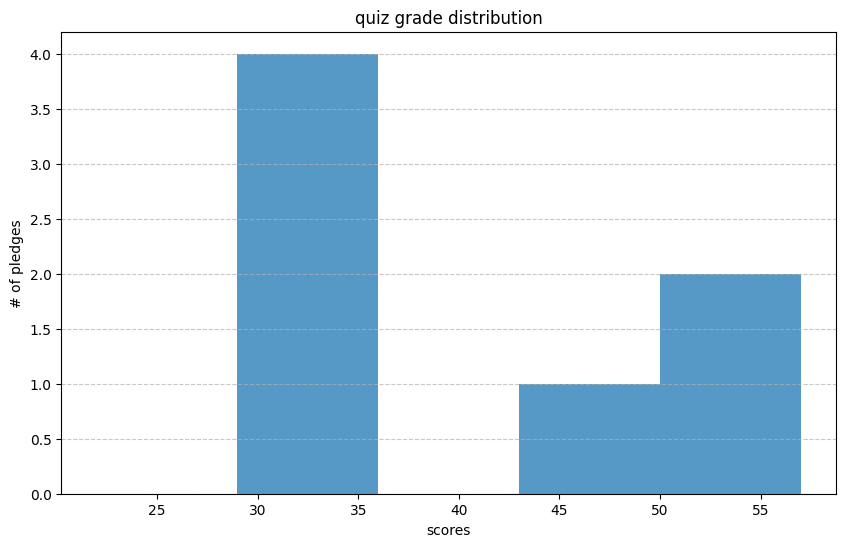

In [29]:
grades = grade_per_pledge.values()
bin_width = 7
bins = np.arange(min(grades) - bin_width, max(grades) + bin_width, bin_width)

plt.figure(figsize=(10, 6))
plt.hist(grades, bins=bins, alpha=0.75)


plt.xlabel("scores")
plt.ylabel("# of pledges")
plt.title("quiz grade distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)


## I'm curious how I can visualize how each pledge did individually, let's try a bar plot!

In [30]:
pledges = list(grade_per_pledge.keys())
grades = list(grade_per_pledge.values())

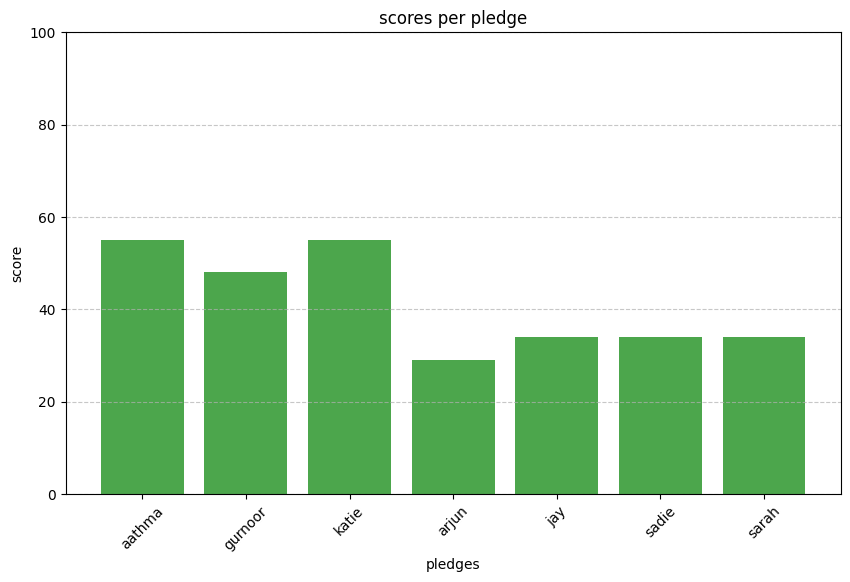

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(pledges, grades, color='green', alpha=0.7)
plt.xlabel("pledges")
plt.ylabel("score")
plt.title("scores per pledge")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Hmm, I still think we can visualize using a grade distribution, let's fit a gaussian to the histogram and find where each pledge lies on the distribution!

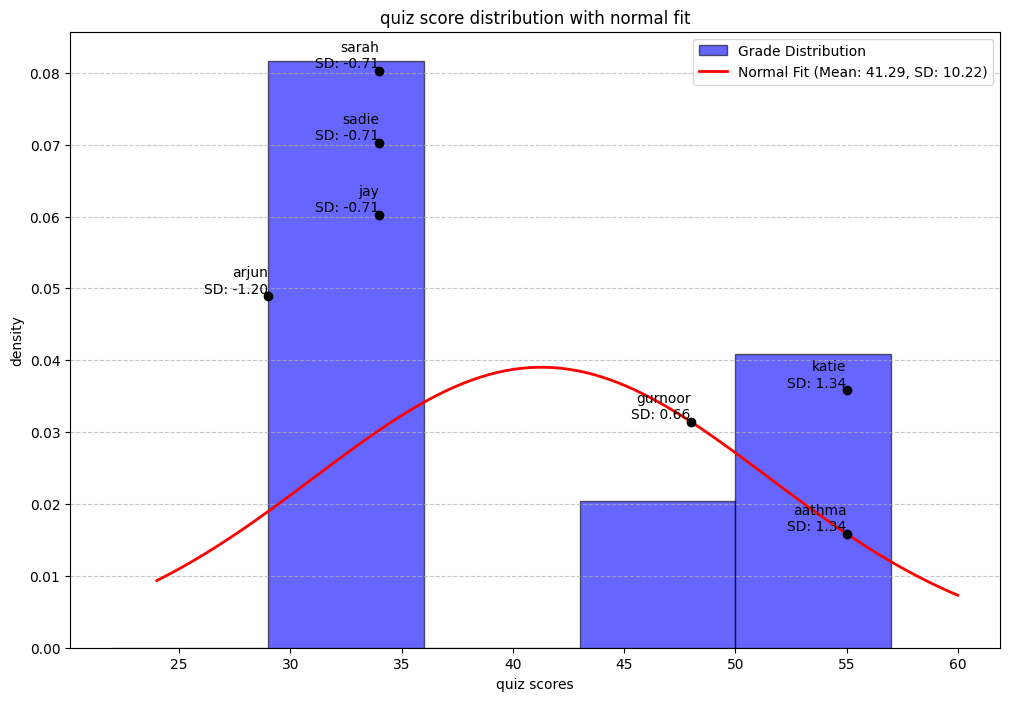

In [40]:
mean = np.mean(grades)
std_dev = np.std(grades)

plt.figure(figsize=(12, 8))
plt.hist(grades, bins=bins, density=True, alpha=0.6, color='blue', edgecolor='black', label="Grade Distribution")

x_values = np.linspace(min(grades) - 5, max(grades) + 5, 100)
pdf_values = norm.pdf(x_values, mean, std_dev) 

plt.plot(x_values, pdf_values, 'r-', lw=2, label="Normal Fit (Mean: {:.2f}, SD: {:.2f})".format(mean, std_dev))

label_positions = defaultdict(int)

for student, grade in grade_per_pledge.items():
    z_score = (grade - mean) / std_dev 
    y_pos = norm.pdf(grade, mean, std_dev)

    while label_positions[round(y_pos, 2)]:  
        y_pos += 0.01 

    label_positions[round(y_pos, 2)] = 1

    plt.scatter(grade, y_pos, color='black', zorder=3)
    plt.text(grade, y_pos, f"{student}\nSD: {z_score:.2f}", 
             fontsize=10, ha='right', va='bottom', color='black')

plt.xlabel("quiz scores")
plt.ylabel("density")
plt.title("quiz score distribution with normal fit")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
